<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/Heart_Disease_prediction_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

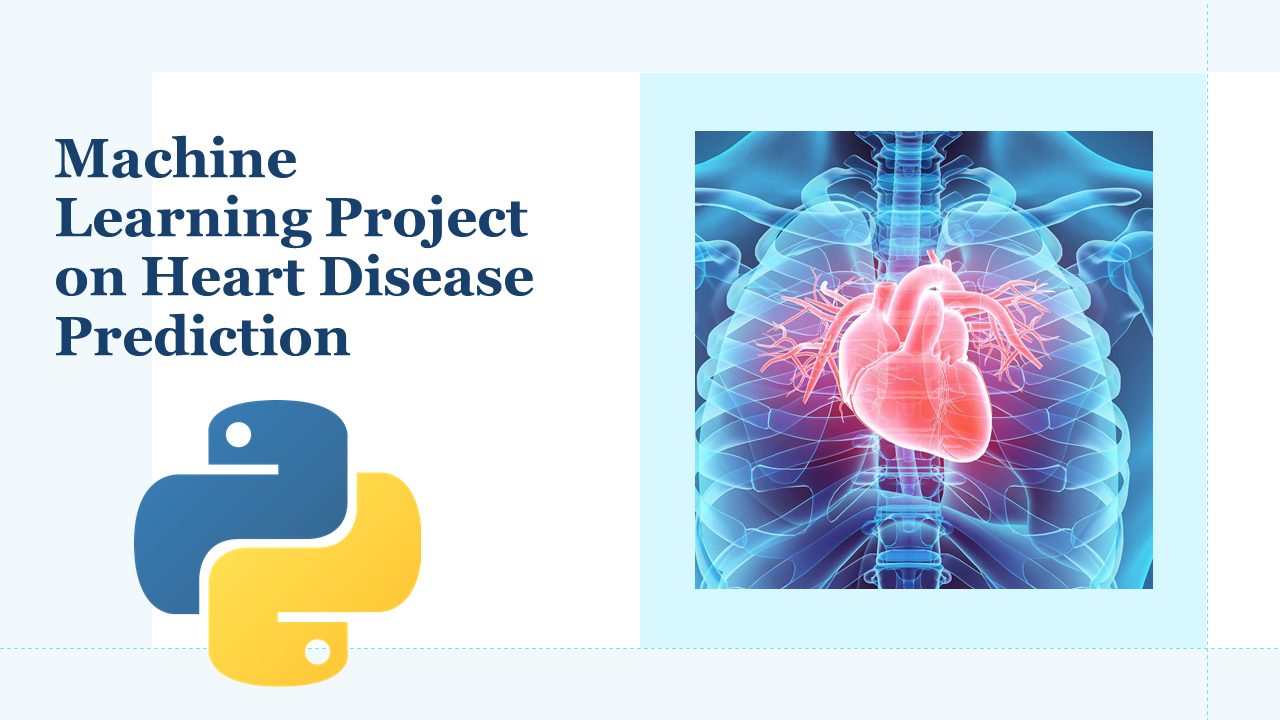

### Authors

- **Prajwal Umla Naik**  
  [100001320](mailto:100001320@stud.srh-university.de)

- **Shreyank Nelamangalaprashanth**  
  [100001357](mailto:100001357@stud.srh-university.de)

- **Praneeth Chikile**  
  [100003143](mailto:100003143@stud.srh-university.de)
  
- **Ashwin Jayan**  
  [100002367](mailto:100002367@stud.srh-university.de)

## Import required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



## Step 1: Define the Problem
**Problem Statement**:  
Predict whether a patient has heart disease based on medical attributes.  

- **Target Variable**:  
  - `0`: No heart disease  
  - `> 0`: Has heart disease (converted to `1` for binary classification)

---

## Step 2: Preprocess the Dataset

1. **Load the Dataset**  
   - The dataset is loaded from the UCI repository with missing values (`?`) handled during loading.

2. **Define Column Names**  
   - Appropriate column names are manually assigned to the dataset.

3. **Handle Missing Values**  
   - Rows with missing data are removed using `data.dropna()`.

4. **Convert Target to Binary Classification**  
   - The `target` column is converted to:  
     - `0`: No heart disease.  
     - `1`: Has heart disease.  
   - Achieved using a lambda function.

5. **Split Data into Features and Target**  
   - **Features (X)**: Input variables.  
   - **Target (y)**: Binary classification (target column).

6. **Split the Dataset**  
   - Data is divided into training (80%) and test (20%) sets using `train_test_split` with a fixed random state.



In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

data = pd.read_csv(url, header=None, names=columns, na_values='?')

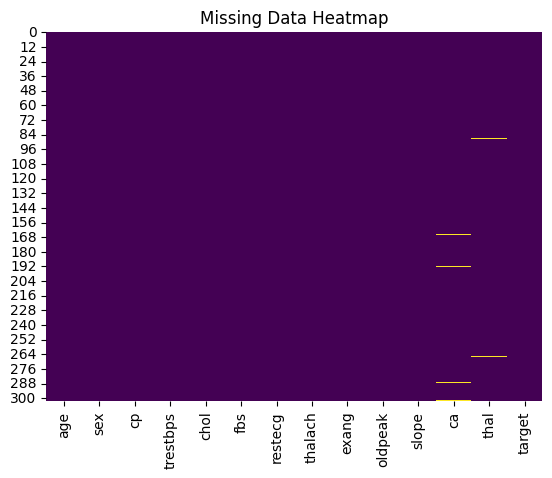

In [3]:
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [4]:
print("Checking for missing values:")
print(data.isnull().sum())

print(f"Missing values: {data.isnull().sum().sum()}")
data = data.dropna()

data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Missing values: 6


<ipython-input-4-36ca7fa511cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)


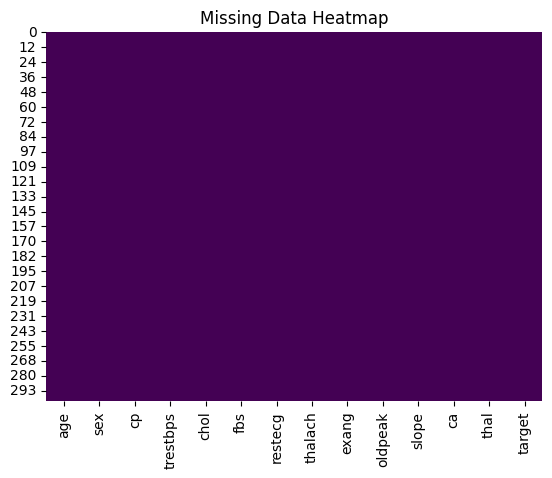

In [5]:
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Step 3: Model Training and Prediction

1. **Feature Scaling**  
   - The `StandardScaler` is used to scale the features in both training and test sets for consistent scaling, crucial for algorithms like Logistic Regression.

2. **Logistic Regression**  
   - A Logistic Regression model is trained on the scaled training data and used to predict heart disease cases on the test set.

3. **Random Forest Classifier**  
   - A Random Forest model is trained on the same scaled training data, and predictions are made on the test set for performance comparison.



In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)

## Step 4: Confusion Matrix and Visualization

1. **Confusion Matrix Calculation**  
   - The confusion matrix compares the true and predicted labels to assess the performance of each model.

2. **Visualization**  
   - The confusion matrix is visualized as a heatmap using Seaborn, with clear annotations and axis labels indicating "No Disease" and "Disease" for better interpretability.


In [7]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

## Step 5: Logistic Regression Results

1. **Logistic Regression Output**  
   - Display the confusion matrix, classification report, and accuracy for the Logistic Regression model.

2. **Confusion Matrix**  
   - Visualize the confusion matrix to evaluate the model's predictions.

3. **Classification Report**  
   - Provide precision, recall, and F1-score for both classes to assess model performance.

4. **Accuracy**  
   - Print the overall accuracy of the Logistic Regression model on the test data.


Logistic Regression Results
Confusion Matrix:


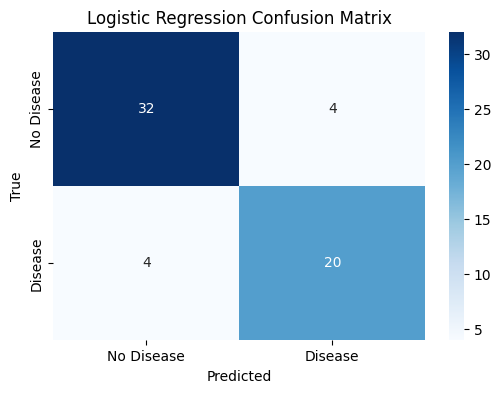

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Accuracy: 0.8666666666666667


In [8]:
print("Logistic Regression Results")
print("Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression Confusion Matrix")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

## Step 6: Random Forest Results

1. **Random Forest Output**  
   - Display the confusion matrix, classification report, and accuracy for the Random Forest model.

2. **Confusion Matrix**  
   - Visualize the confusion matrix to evaluate the model's predictions.

3. **Classification Report**  
   - Provide precision, recall, and F1-score metrics to assess model performance.

4. **Accuracy**  
   - Print the overall accuracy of the Random Forest model on the test data.


Random Forest Results
Confusion Matrix:


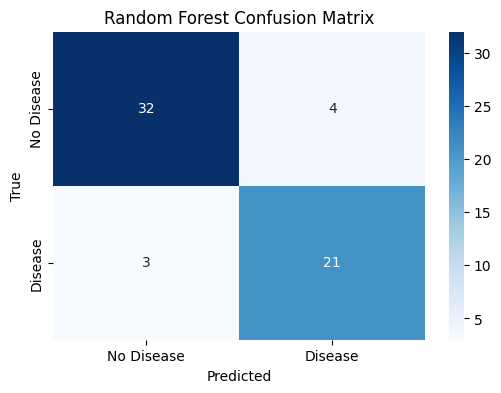

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Accuracy: 0.8833333333333333


In [9]:
print("Random Forest Results")
print("Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

## Step 7: Performance Comparison

1. **Performance Metrics**  
   - Calculate and compare key metrics: Precision, Recall, F1-Score, and Accuracy for both Logistic Regression and Random Forest.

2. **Metrics Calculation**  
   - Store the calculated metrics in dictionaries for each model and display them.

3. **Model Comparison**  
   - Compare the models based on accuracy and identify which model performs better.



In [10]:
print("Performance Comparison:")
log_reg_metrics = {
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'Accuracy': accuracy_score(y_test, y_pred_log_reg)
}

rf_metrics = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf)
}

print("Logistic Regression Metrics:", log_reg_metrics)
print("Random Forest Metrics:", rf_metrics)

if log_reg_metrics['Accuracy'] > rf_metrics['Accuracy']:
    print("Logistic Regression performs better.")
elif log_reg_metrics['Accuracy'] < rf_metrics['Accuracy']:
    print("Random Forest performs better.")
else:
    print("Both models have the same accuracy.")

Performance Comparison:
Logistic Regression Metrics: {'Precision': 0.8333333333333334, 'Recall': 0.8333333333333334, 'F1-Score': 0.8333333333333334, 'Accuracy': 0.8666666666666667}
Random Forest Metrics: {'Precision': 0.84, 'Recall': 0.875, 'F1-Score': 0.8571428571428571, 'Accuracy': 0.8833333333333333}
Random Forest performs better.


**Performance Analysis**

The accuracy achieved by the Random Forest model is **88.33%**, slightly outperforming Logistic Regression, which achieved an accuracy of **86.67%**.





#### **Metrics Overview**
1. **Logistic Regression:**
   - Precision: **83.33%**
   - Recall: **83.33%**
   - F1-Score: **83.33%**
   - Accuracy: **86.67%**

2. **Random Forest:**
   - Precision: **84.00%**
   - Recall: **87.50%**
   - F1-Score: **85.71%**
   - Accuracy: **88.33%**



### **Key Observations**
- The **Random Forest** model outperformed the Logistic Regression model in terms of overall performance, especially in **Recall** and **F1-Score**. This suggests that Random Forest was more effective at correctly identifying patients with heart disease, minimizing false negatives.
- **Logistic Regression**, while showing similar precision to Random Forest, lagged behind in **Recall**, implying it missed some cases of heart disease, leading to a higher number of false negatives.
